## Importing Packages

In [20]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [21]:
# link to import data
data_url="https://www.berlin.de/sen/uvk/_assets/verkehr/infrastruktur/oeffentliche-toiletten/berliner-toiletten-standorte.xlsx"

## Importing data from source


In [22]:
data = pd.read_excel(data_url)

## Importing new data and fixing the new data structure

In [23]:
data_SANIFAIR_RAIL=pd.read_excel("Raw Data/berliner-toiletten-SANIFAIR_Rail.xlsx")
data_SANIFAIR_RAIL.columns = data_SANIFAIR_RAIL.iloc[2]
data_SANIFAIR_RAIL.drop([0,1,2],inplace=True)
data_SANIFAIR_RAIL.head()

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,SANIFAIR_1,"SANIFAIR, Bahnhof Berlin Gesundbrunnen",Berlin,Badstr. 1-3 (0-24 Uhr),NaN,13357,Deutschland,"13,38873609","52,54891346",0,1,0.5,1,0,0,1,6,1,NaN
4,SANIFAIR_2,"SANIFAIR, Gesundbrunnen-Center",Berlin,Badstr. 4 (6-20 Uhr),NaN,13357,Deutschland,"13,38851667","52,549209",0,1,0.5,1,0,0,1,6,1,NaN
5,SANIFAIR_3,"SANIFAIR, Zoologischer Garten Berlin",Berlin,Hardenbergplatz 9-11 (6-22 Uhr),NaN,10623,Deutschland,"13,33415332","52,50829652",0,0,0.5,1,0,0,0,6,1,NaN
6,SANIFAIR_4,"SANIFAIR, Bahnhof Berlin Friedrichstraße",Berlin,Georgenstraße 14 (6-22 Uhr),NaN,10117,Deutschland,"13,38724992","52,51996653",0,0,0.5,1,0,0,1,6,1,NaN
7,SANIFAIR_5,"SANIFAIR, Bahnhof Berlin Alexanderplatz",Berlin,Dircksenstraße 2 (6-22 Uhr),NaN,10179,Deutschland,"13,41175471","52,52139858",0,1,0.5,1,0,0,1,6,1,NaN


In [24]:
data_SANIFAIR_RAIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 3 to 17
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LavatoryID               15 non-null     object
 1   Description              15 non-null     object
 2   City                     15 non-null     object
 3   Street                   15 non-null     object
 4   Number                   0 non-null      object
 5   PostalCode               15 non-null     object
 6   Country                  15 non-null     object
 7   Longitude                15 non-null     object
 8   Latitude                 15 non-null     object
 9   isOwnedByWall            15 non-null     object
 10  isHandicappedAccessible  15 non-null     object
 11  Price                    15 non-null     object
 12  canBePayedWithCoins      15 non-null     object
 13  canBePayedInApp          15 non-null     object
 14  canBePayedWithNFC        15 non-null     obj

## Viewing data

In [25]:
data.head()

,Stand:27.04.2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN


## Fixing data structure

In [26]:
# Making row 2 the column headings
data.columns = data.iloc[2]

In [27]:
data.head()

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN


In [28]:
# dropping redundant rows
data.drop([0,1,2],inplace=True)

## Appending new data

In [29]:
data=data.append(data_SANIFAIR_RAIL,ignore_index=True)

## Exploring data

In [30]:
data.shape

(455, 19)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LavatoryID               455 non-null    object
 1   Description              455 non-null    object
 2   City                     455 non-null    object
 3   Street                   455 non-null    object
 4   Number                   0 non-null      object
 5   PostalCode               455 non-null    object
 6   Country                  455 non-null    object
 7   Longitude                455 non-null    object
 8   Latitude                 455 non-null    object
 9   isOwnedByWall            455 non-null    object
 10  isHandicappedAccessible  455 non-null    object
 11  Price                    455 non-null    object
 12  canBePayedWithCoins      455 non-null    object
 13  canBePayedInApp          455 non-null    object
 14  canBePayedWithNFC        455 non-null    o

In [32]:
data.tail()

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
450,RAIL_4,rail & fresh WC Berlin Südkreuz Ost\n,Berlin,General-Pape-Straße 1 (0-24 Uhr),NaN,12101,Deutschland,"13,36580484","52,47616962",0,1,0.5,1,0,0,1,6,1,NaN
451,RAIL_5,rail & fresh WC Berlin Südkreuz West\n,Berlin,Hildegard-Knef-Platz (0-24 Uhr),NaN,10829,Deutschland,"13,3641735","52,47643492",0,1,0.5,1,0,0,1,6,1,NaN
452,RAIL_6,rail & fresh WC Berlin Ostbahnhof\n,Berlin,Koppenstraße 3 (6-22 Uhr),NaN,10243,Deutschland,"13,43510438","52,51022553",0,1,0.5,1,0,0,1,6,1,NaN
453,RAIL_7,rail & fresh WC Potsdamer Platz Arkaden,Berlin,Potsdamer Platz 1 (0-24 Uhr),NaN,10785,Deutschland,"13,37594681","52,50964678",0,1,0.5,1,0,0,1,6,1,NaN
454,RAIL_8,\nrail & fresh WC Berlin Haupbahnhof,Berlin,Europaplatz 1 (0-24 Uhr),NaN,10557,Deutschland,"13,36846833","52,5256898",0,1,0.5,1,0,1,1,6,1,NaN


## Exploring missing data

In [33]:
data.isnull().sum()

2
LavatoryID                   0
Description                  0
City                         0
Street                       0
Number                     455
PostalCode                   0
Country                      0
Longitude                    0
Latitude                     0
isOwnedByWall                0
isHandicappedAccessible      0
Price                        0
canBePayedWithCoins          0
canBePayedInApp              0
canBePayedWithNFC            0
hasChangingTable             0
LabelID                      0
hasUrinal                    0
FID                        106
dtype: int64

<AxesSubplot:>

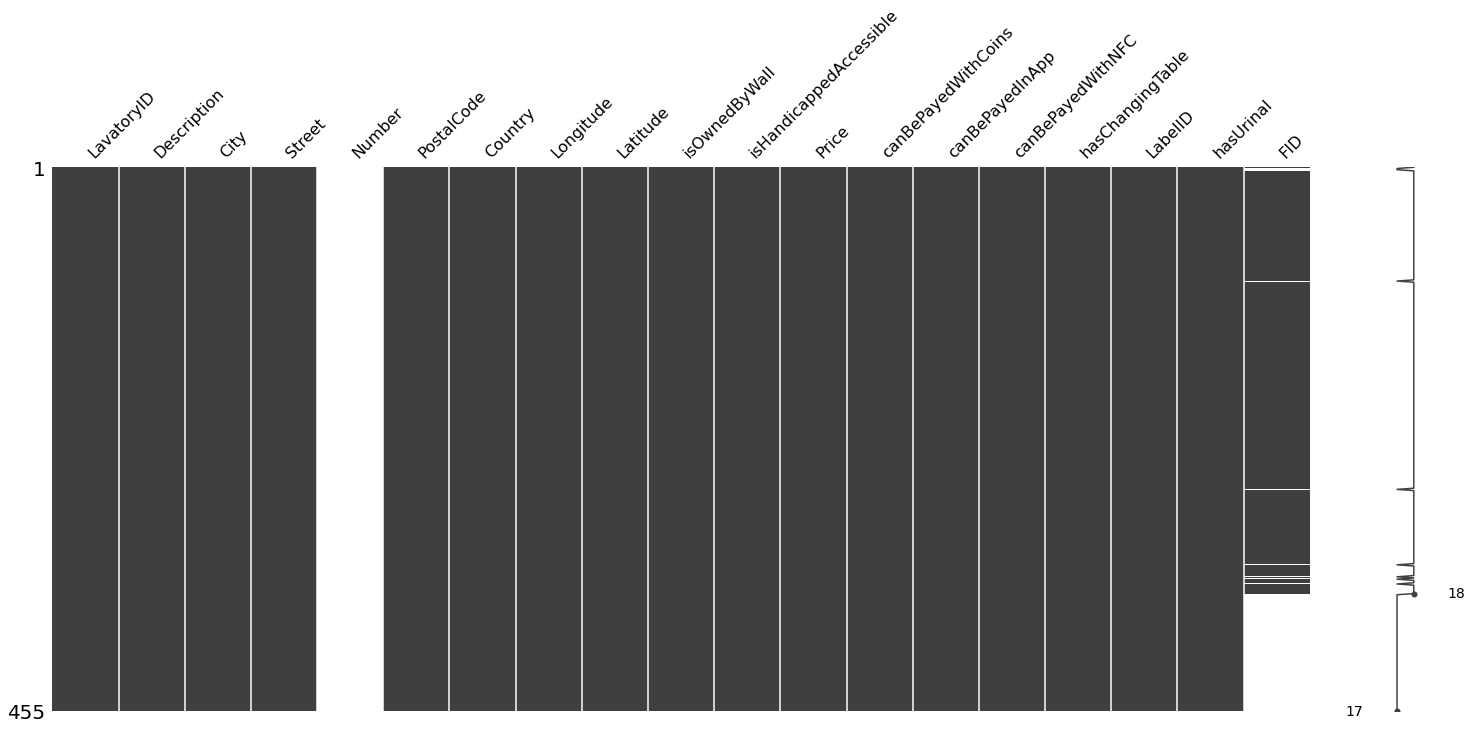

In [34]:
msno.matrix(data)

##### Since FID is an external identification number and does not affect our app we leave the missing numbers
##### Number Column is the House number/Location, since all the values are missing and the location can also be detected using the lattitude and longitude columns we will leave the missing values as they are 

## Extracting opening hours and address from Street column

In [35]:
df1=pd.DataFrame({'Street':data['Street']})
df1[['address','timings']]=df1['Street'].str.split('(',n=1,expand=True)
df1['timings']=df1['timings'].str.extract('([0-9]+-[0-9]+)')
df1[['opening_hour','closing_hour']]=df1['timings'].str.split("-",n=1,expand=True)
data['opening_hours']=df1['opening_hour']+str(':00')+str('-')+df1['closing_hour']+str(':00')
data['street_address']=df1['address']
data=data[['LavatoryID', 'Description', 'City', 'Street','opening_hours', 'street_address', 'Number', 'PostalCode',
       'Country', 'Longitude', 'Latitude', 'isOwnedByWall',
       'isHandicappedAccessible', 'Price', 'canBePayedWithCoins',
       'canBePayedInApp', 'canBePayedWithNFC', 'hasChangingTable', 'LabelID',
       'hasUrinal', 'FID' ]]

In [36]:
# Deleting Number column as it add no value
data.drop('Number', axis=1, inplace=True)
data.drop('FID', axis=1, inplace=True)

In [37]:
data.head()

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal
0,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",0:00-24:00,"Krumme Lanke, Quermatenweg",14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0
1,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",0:00-24:00,"Schlachtensee , Am Schlachtensee ggü. 145",14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0
2,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),0:00-24:00,Spektepark,13589,Deutschland,"13,1648593254089","52,5488398803196",1,0,"0,00",0,0,0,0,5,0
3,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),0:00-24:00,Hubertusdamm ggü. 7,13125,Deutschland,"13,4711982596938","52,615670613826",1,1,"0,50",1,1,1,1,1,1
4,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),0:00-24:00,Lindenufer ggü. 10,13597,Deutschland,"13,2077640060379","52,537351114776",1,1,"0,50",1,1,1,1,1,0


In [38]:
#Replacing values to make more sense
data["isOwnedByWall"] = data["isOwnedByWall"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["isHandicappedAccessible"] = data["isHandicappedAccessible"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedWithCoins"] = data["canBePayedWithCoins"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedInApp"] = data["canBePayedInApp"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedWithNFC"] = data["canBePayedWithNFC"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["hasChangingTable"] = data["hasChangingTable"].replace(to_replace=[1, 0], value=["Yes", "No/Unknown"])
data["hasUrinal"] = data["hasUrinal"].replace(to_replace=[1, 0], value=["Yes", "No"])

In [39]:
data['Latitude']=data['Latitude'].str.replace(',', '.').astype(np.float64)
data['Longitude']=data['Longitude'].str.replace(',', '.').astype(np.float64)
#data['Price']=data['Price'].str.replace(',', '.').astype(np.float64)

In [40]:
data["LabelID"] = data["LabelID"].replace(to_replace=[1, 2,3,4,5,6], value=["Berliner Toilette", "City Toilette","WC-Center","Café Achteck","weitere ÖTs (z.B. Sanitärcontainer)","Toilette nicht von Wall"])

In [41]:
data.head()

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal
0,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",0:00-24:00,"Krumme Lanke, Quermatenweg",14109,Deutschland,13.240575,52.453581,Yes,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No
1,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",0:00-24:00,"Schlachtensee , Am Schlachtensee ggü. 145",14129,Deutschland,13.199229,52.436507,Yes,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No
2,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),0:00-24:00,Spektepark,13589,Deutschland,13.164859,52.548840,Yes,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No
3,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),0:00-24:00,Hubertusdamm ggü. 7,13125,Deutschland,13.471198,52.615671,Yes,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes
4,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),0:00-24:00,Lindenufer ggü. 10,13597,Deutschland,13.207764,52.537351,Yes,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,No


In [42]:
#data.to_csv('C:/Users/Rashmi Dsouza/Desktop/TechLabs/Project/Data/draft_peedom.csv')

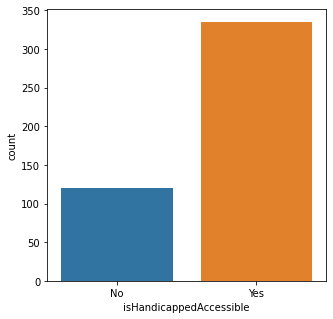

In [43]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['isHandicappedAccessible'], ax=ax)
plt.show()

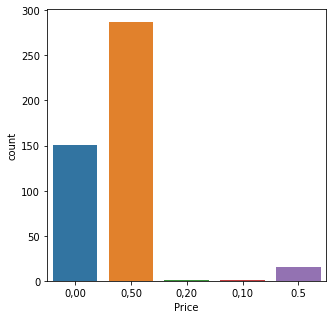

In [44]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['Price'], ax=ax)
plt.show()

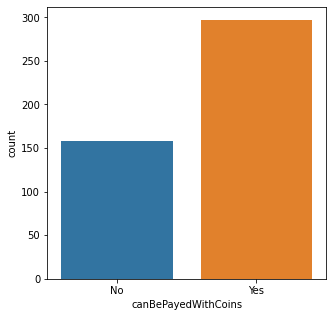

In [45]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['canBePayedWithCoins'], ax=ax)
plt.show()

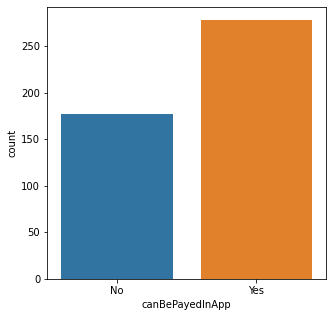

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['canBePayedInApp'], ax=ax)
plt.show()

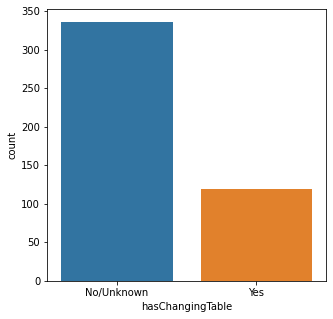

In [47]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['hasChangingTable'], ax=ax)
plt.show()

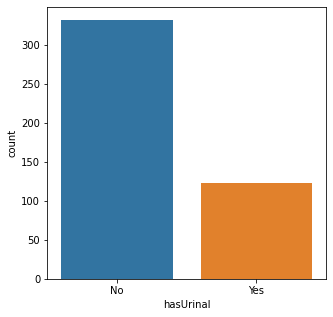

In [48]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['hasUrinal'], ax=ax)
plt.show()

In [49]:
# Adding placeholder google ratings
data['google_rating_rank']=np.random.randint(1,6,size=len(data.index))

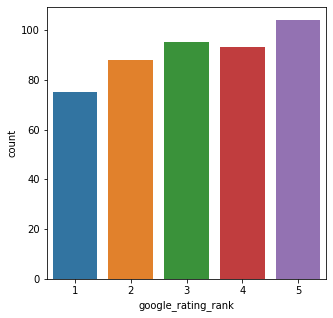

In [50]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['google_rating_rank'], ax=ax)
plt.show()

In [51]:
# Adding weights depending on the feature importance
mapping = {'Yes': 1, 'No': 0}

pricing = {'0.00': 5,'0.10':4, '0.20':3 ,'0.50':2}

#distancing = {}

# Assigning weights to individual features and storing them in new coulmns
 
data['isHandicappedAccessible_1'] = (data['isHandicappedAccessible'].replace(mapping))*2
data['Price_1'] = (data['Price'].replace(pricing))*5
data['canBePayedWithCoins_1'] = (data['canBePayedWithCoins'].replace(mapping))*3
data['canBePayedInApp_1'] = (data['canBePayedInApp'].replace(mapping))*2
data['hasChangingTable_1'] = (data['hasChangingTable'].replace(mapping))*2
data['hasUrinal_1'] = (data['hasUrinal'].replace(mapping))*3
data['google_rating_rank_1'] =(data['google_rating_rank'])*4
data['Comments']=''


#summing up weights of individual features

data['ratings'] = data[['isHandicappedAccessible_1','Price_1','canBePayedWithCoins_1','canBePayedInApp_1','hasChangingTable_1',
                    'hasUrinal_1','google_rating_rank_1']].sum(axis=1)

#Assigning the sum to rating ranging from 1-5. Example a sum of 40, is assigned between a range 30-40 
#and then the value is assigned to a rating of 4

#ranges = [0,4,10,20,40,np.inf]

#cat = ['1','2','3','4','5']

#data['ratings'] = pd.cut(data['Sum'], bins = ranges, labels = cat)

#if there are NaN values present in ratings those columns are dropped

data = data[~data['ratings'].isna()]

In [52]:
data

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,...,google_rating_rank,isHandicappedAccessible_1,Price_1,canBePayedWithCoins_1,canBePayedInApp_1,hasChangingTable_1,hasUrinal_1,google_rating_rank_1,Comments,ratings
0,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",0:00-24:00,"Krumme Lanke, Quermatenweg",14109,Deutschland,13.240575,52.453581,...,4,0,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,16,,16
1,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",0:00-24:00,"Schlachtensee , Am Schlachtensee ggü. 145",14129,Deutschland,13.199229,52.436507,...,3,0,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,12,,12
2,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),0:00-24:00,Spektepark,13589,Deutschland,13.164859,52.548840,...,2,0,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,8,,8
3,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),0:00-24:00,Hubertusdamm ggü. 7,13125,Deutschland,13.471198,52.615671,...,3,2,"0,500,500,500,500,50",3,2,2,3,12,,22
4,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),0:00-24:00,Lindenufer ggü. 10,13597,Deutschland,13.207764,52.537351,...,5,2,"0,500,500,500,500,50",3,2,2,0,20,,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,RAIL_4,rail & fresh WC Berlin Südkreuz Ost\n,Berlin,General-Pape-Straße 1 (0-24 Uhr),0:00-24:00,General-Pape-Straße 1,12101,Deutschland,13.365805,52.476170,...,2,2,2.5,3,0,2,3,8,,16
451,RAIL_5,rail & fresh WC Berlin Südkreuz West\n,Berlin,Hildegard-Knef-Platz (0-24 Uhr),0:00-24:00,Hildegard-Knef-Platz,10829,Deutschland,13.364173,52.476435,...,3,2,2.5,3,0,2,3,12,,20
452,RAIL_6,rail & fresh WC Berlin Ostbahnhof\n,Berlin,Koppenstraße 3 (6-22 Uhr),6:00-22:00,Koppenstraße 3,10243,Deutschland,13.435104,52.510226,...,5,2,2.5,3,0,2,3,20,,28
453,RAIL_7,rail & fresh WC Potsdamer Platz Arkaden,Berlin,Potsdamer Platz 1 (0-24 Uhr),0:00-24:00,Potsdamer Platz 1,10785,Deutschland,13.375947,52.509647,...,5,2,2.5,3,0,2,3,20,,28


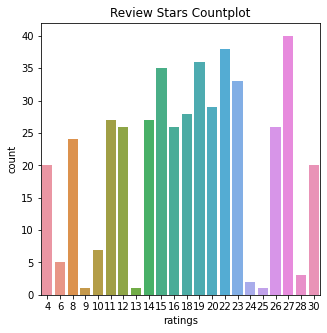

In [53]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['ratings'], ax=ax)
plt.title('Review Stars Countplot')
plt.show()

In [54]:
top_toilets=data[['LavatoryID','Description','City','Street','opening_hours','street_address','PostalCode',
       'Country','Longitude','Latitude','isOwnedByWall',
       'isHandicappedAccessible','Price','canBePayedWithCoins',
       'canBePayedInApp','canBePayedWithNFC','hasChangingTable','LabelID',
       'hasUrinal','ratings','Comments']].sort_values(by=['ratings'], ascending=False)

In [55]:
top_toilets

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,...,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,ratings,Comments
227,Wall_123495,"Wall CT, Barnetstr.",Berlin,Barnetstr. ggü. 54 (0-24 Uhr),0:00-24:00,Barnetstr. ggü. 54,12305,Deutschland,13.396125,52.396915,...,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes,30,
147,Wall_122524,"Wall CT, S-Bhf. Friedrichshagen, Dahlwitzer La...",Berlin,"S-Bhf. Friedrichshagen, Dahlwitzer Landstr. ...",0:00-24:00,"S-Bhf. Friedrichshagen, Dahlwitzer Landstr.",12587,Deutschland,13.625350,52.457726,...,Yes,"0,50",Yes,Yes,Yes,No/Unknown,Berliner Toilette,Yes,30,
234,Wall_123502,"Wall CT, Bosepark, Manteuffelstr.",Berlin,"Bosepark, Manteuffelstr. ggü. 9 (0-24 Uhr)",0:00-24:00,"Bosepark, Manteuffelstr. ggü. 9",12103,Deutschland,13.377623,52.463965,...,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes,30,
237,Wall_123562,"Wall CT, Alt-Gatow",Berlin,Alt-Gatow hinter 65 (0-24 Uhr),0:00-24:00,Alt-Gatow hinter 65,14089,Deutschland,13.183582,52.483931,...,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes,30,
221,Wall_123484,"Wall CT, Viktoriapark, Kreuzbergstr.",Berlin,"Viktoriapark, Kreuzbergstr. ggü. 31 (0-24 Uhr)",0:00-24:00,"Viktoriapark, Kreuzbergstr. ggü. 31",10965,Deutschland,13.377600,52.489357,...,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes,30,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Fremd_153,"Toilette Friedenstr. 8-10, 14109 Berlin",Berlin,"Friedenstr. 8-10, 14109 Berlin",NaN,"Friedenstr. 8-10, 14109 Berlin",14109,Deutschland,13.141648,52.413633,...,No,"0,00",No,No,No,No/Unknown,Toilette nicht von Wall,No,4,
425,Fremd_177,"Toilette Mittelpunktsbibliothek Alter Markt 2,...",Berlin,"Mittelpunktsbibliothek Alter Markt 2, 12555 Be...",NaN,"Mittelpunktsbibliothek Alter Markt 2, 12555 Be...",12555,Deutschland,13.584515,52.446697,...,No,"0,00",No,No,No,No/Unknown,Toilette nicht von Wall,No,4,
300,Wall_5332,Toilette Olympischer Platz,Berlin,"Olympiastadion, Gutsmuthsweg (bei Veranst.)",NaN,"Olympiastadion, Gutsmuthsweg",14053,Deutschland,13.244028,52.514222,...,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No,4,
416,Fremd_169,Toilette Mittelpunktbibliothek Michael-Brückne...,Berlin,"Mittelpunktbibliothek Michael-Brückner-Str. 9,...",NaN,"Mittelpunktbibliothek Michael-Brückner-Str. 9,...",12439,Deutschland,13.514210,52.453957,...,No,"0,00",No,No,No,No/Unknown,Toilette nicht von Wall,No,4,


In [56]:
top_toilets.to_csv('C:/Users/Joma/Techlabs/st22-peedom/Data/Raw Data/top_toilets.csv')